# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

This project aims to predict salaries given a set of job postings.

In [387]:
#Import libraries

import numpy as np
import sklearn as sk
import scipy as sp #imports stats functions
%matplotlib inline
import matplotlib as mpl # timports matplotlib
import matplotlib.cm as cm #allows easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns #sets up styles, gives more plotting options

# Import Linear Regression Libraries 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#Contact Information
__author__ = "Annette Kiplagat"
__email__ = "_@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [388]:
#load data into a Pandas dataframe
features = pd.read_csv("data/train_features.csv")
salaries = pd.read_csv("data/train_salaries.csv")

In [389]:
# Check features dataframes
features.head()


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [390]:
features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [391]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [392]:
#Check Salaries dataframe
salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [393]:
salaries.describe()

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


In [394]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [395]:
# Combine 'salaries' and'features' data frames by 'jobId'
postings =pd.merge(features,salaries,on='jobId')
postings.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [396]:
postings.sort_values(by=['salary'])

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
141942,JOB1362684549629,COMP27,JANITOR,NONE,NONE,EDUCATION,0,98,17
482429,JOB1362684890116,COMP46,JANITOR,NONE,NONE,EDUCATION,0,92,18
807108,JOB1362685214795,COMP29,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,0,92,18
188931,JOB1362684596618,COMP26,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,96,18
60556,JOB1362684468243,COMP23,JANITOR,NONE,NONE,EDUCATION,1,93,19


In [397]:
postings.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


### ---- 3 Clean the data ----

In [398]:
# Check for missing values
postings.isnull()


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [399]:
# Remove rows with salary <= 0 
#postings.drop(postings['salary']==0], inplace = True )
postings.drop(postings[postings['salary']<=0].index,axis=0, inplace=True)
postings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### ---- 4 Explore the data (EDA) ----

a. Visualize Data

Text(0.5, 1.0, 'Salary Histogram')

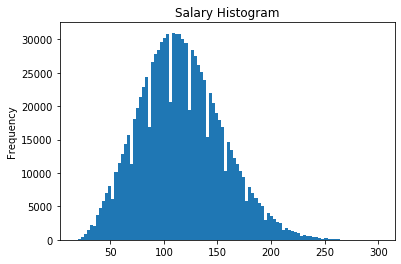

In [400]:
#Summary of Target Variable: Salary
postings['salary'].plot.hist(bins=100)
#sns.distplot(postings['salary'])
plt.title('Salary Histogram')

Text(0.5, 1.0, 'Years of Experience Histogram')

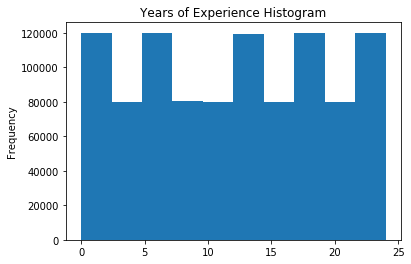

In [401]:
postings['yearsExperience'].plot.hist(bins=10)
#sns.distplot(postings['yearsExperience'],bins=10)
plt.title('Years of Experience Histogram')

Text(0.5, 1.0, 'Salary vs Years of Experience')

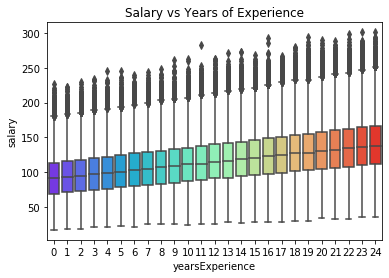

In [402]:
sns.boxplot(x='yearsExperience',y='salary',data= postings,palette='rainbow')
plt.title('Salary vs Years of Experience')


Text(0.5, 1.0, 'milesFromMetropolis Histogram')

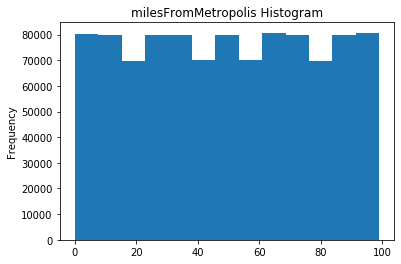

In [403]:
postings['milesFromMetropolis'].plot.hist(bins= 13)
plt.title('milesFromMetropolis Histogram')

Text(0.5, 1.0, 'Salary vs Miles from Metropolis')

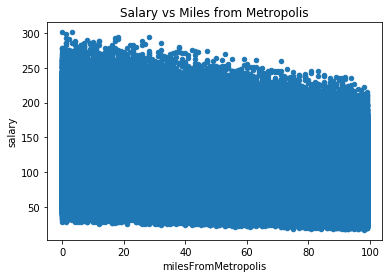

In [404]:
postings.plot.scatter(x='milesFromMetropolis',y='salary')
plt.title('Salary vs Miles from Metropolis')

b. Visualize Data: Categorical Plots 

Text(0.5, 1.0, 'Salary by Years of Experience')

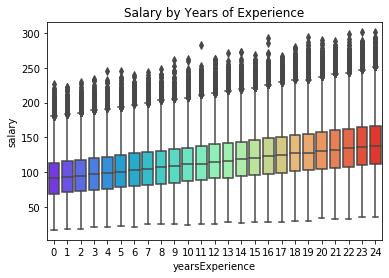

In [405]:
sns.boxplot(x="yearsExperience", y="salary", data= postings,palette='rainbow')
plt.title('Salary by Years of Experience')

Text(0.5, 1.0, 'Salary by Industry')

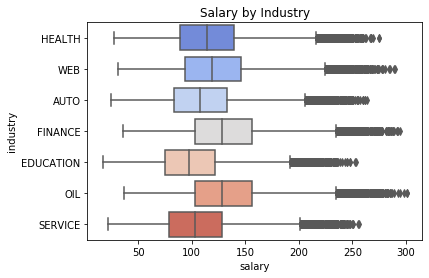

In [406]:
sns.boxplot(y="industry", x="salary", data= postings, orient='h',palette='coolwarm')
plt.title('Salary by Industry')

Text(0.5, 1.0, 'Salary by Major')

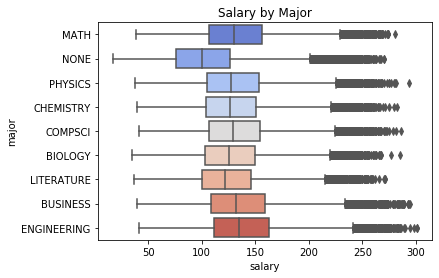

In [407]:
sns.boxplot(y="major", x="salary",data= postings,
            orient ="h", palette='coolwarm')
plt.title('Salary by Major')

Text(0.5, 0, 'Count of Degree')

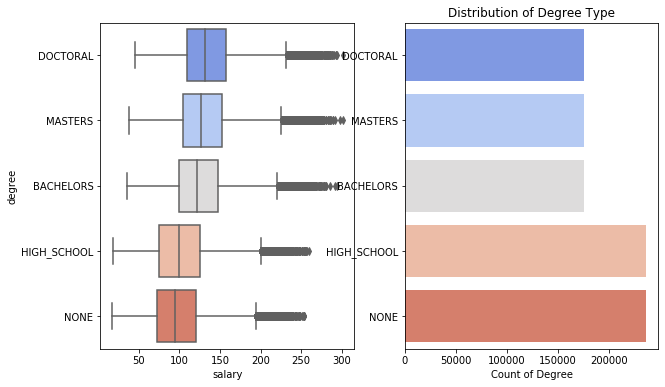

In [408]:
# Set up matplotlib figure
f, axes = plt.subplots(ncols=2 , figsize=(10, 6))

# Graph Salary vs Degree 
sns.boxplot(y="degree", x="salary", data= postings,palette='coolwarm',
            order = ["DOCTORAL","MASTERS","BACHELORS","HIGH_SCHOOL","NONE"],
            ax = axes[0]) 
plt.title('Salary by degree')

# Graph count of degree types
degreeType = postings.degree.value_counts()
sns.barplot(x=degreeType.values, y=degreeType.index, 
            order = ["DOCTORAL","MASTERS","BACHELORS","HIGH_SCHOOL","NONE"],
            palette='coolwarm', ax = axes[1])
plt.title('Distribution of Degree Type')
plt.xlabel('Count of Degree')


Text(0.5, 0, 'Salary')

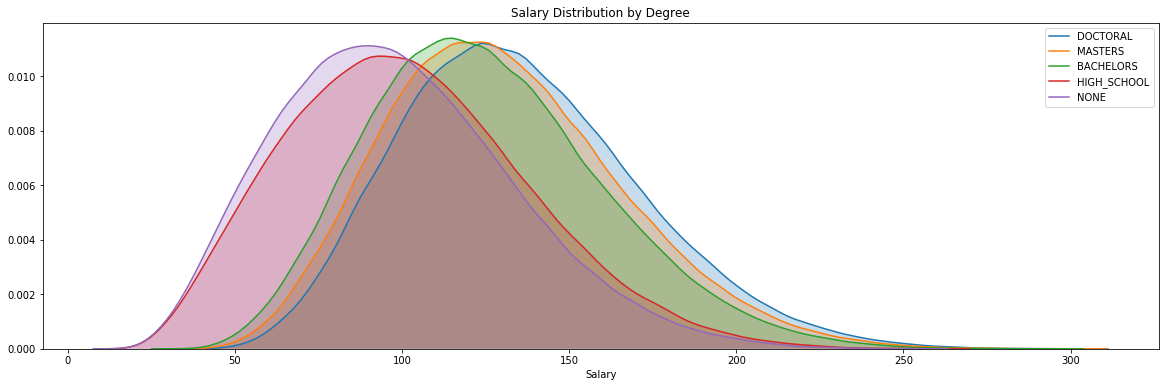

In [409]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(20,6))
ax=sns.kdeplot(postings.loc[(postings['degree'] == "DOCTORAL"),'salary'] ,shade=True, label='DOCTORAL')
ax=sns.kdeplot(postings.loc[(postings['degree'] == "MASTERS"),'salary'] , shade=True, label='MASTERS')
ax=sns.kdeplot(postings.loc[(postings['degree'] == "BACHELORS"),'salary'] , shade=True, label='BACHELORS')
ax=sns.kdeplot(postings.loc[(postings['degree'] == "HIGH_SCHOOL"),'salary'] , shade=True, label='HIGH_SCHOOL')
ax=sns.kdeplot(postings.loc[(postings['degree'] == "NONE"),'salary'], shade=True, label='NONE')
plt.title('Salary Distribution by Degree')
plt.xlabel('Salary')

Text(0.5, 0, 'Count of Job Type')

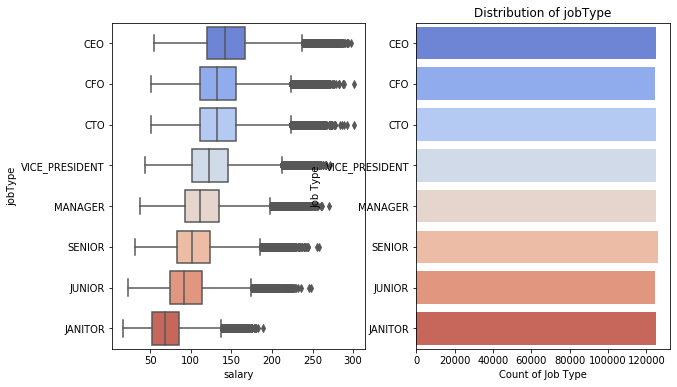

In [410]:
# Set up matplotlib figure
f, axes = plt.subplots(ncols=2 , figsize=(10, 6))

# Graph Salary vs jobType
sns.boxplot(y="jobType", x="salary", data= postings,orient = "h",
            order = ["CEO","CFO","CTO","VICE_PRESIDENT","MANAGER","SENIOR","JUNIOR","JANITOR"],
            palette='coolwarm',ax = axes[0]) 

# Graph count of job types
jobtype = postings.jobType.value_counts()
sns.barplot(x=jobtype.values, y=jobtype.index,orient="h", 
            order = ["CEO","CFO","CTO","VICE_PRESIDENT","MANAGER","SENIOR","JUNIOR","JANITOR"],
            palette='coolwarm', ax = axes[1])
plt.title('Distribution of jobType')
plt.ylabel('Job Type')
plt.xlabel('Count of Job Type')

Text(0.5, 0, 'Salary')

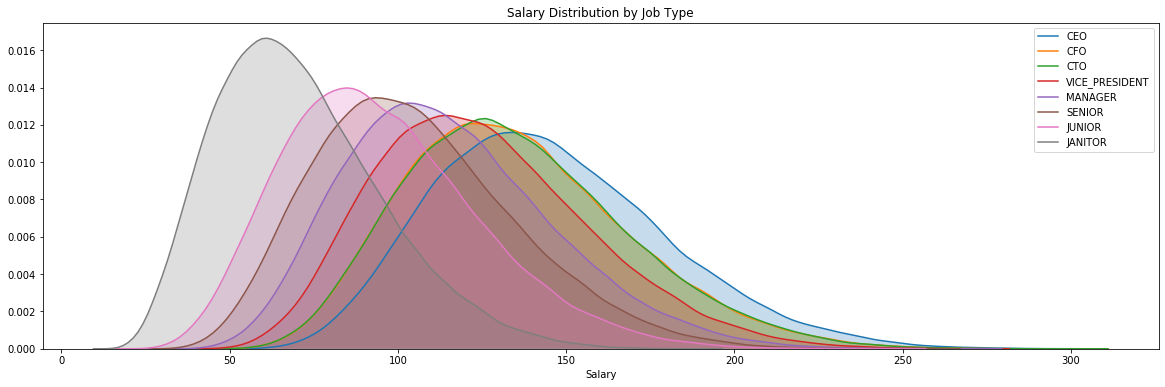

In [411]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(20,6))
ax=sns.kdeplot(postings.loc[(postings['jobType'] == "CEO"),'salary'] ,shade=True, label='CEO')
ax=sns.kdeplot(postings.loc[(postings['jobType'] == "CFO"),'salary'] , shade=True, label='CFO')
ax=sns.kdeplot(postings.loc[(postings['jobType'] == "CTO"),'salary'] , shade=True, label='CTO')
ax=sns.kdeplot(postings.loc[(postings['jobType'] == "VICE_PRESIDENT"),'salary'] , shade=True, label='VICE_PRESIDENT')
ax=sns.kdeplot(postings.loc[(postings['jobType'] == "MANAGER"),'salary'], shade=True, label='MANAGER')
ax=sns.kdeplot(postings.loc[(postings['jobType'] == "SENIOR"),'salary'] , shade=True, label='SENIOR')
ax=sns.kdeplot(postings.loc[(postings['jobType'] == "JUNIOR"),'salary'] , shade=True, label='JUNIOR')
ax=sns.kdeplot(postings.loc[(postings['jobType'] == "JANITOR"),'salary'], shade=True, label='JANITOR')
plt.title('Salary Distribution by Job Type')
plt.xlabel('Salary')

In [412]:
#sns.boxplot(x="companyId", y="salary", data= postings, palette='coolwarm')
#plt.title('Salary by Company ID')


In [413]:
#sns.lmplot(x='yearsExperience', y='salary', data=postings,
#           fit_reg=False, # No regression line
#           hue='degree')# Color by degree type
             

In [414]:
#sns.lmplot(x='yearsExperience', y='salary', data=postings,
#          fit_reg=False, # No regression line
#         hue='jobType')# Color by degree type

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


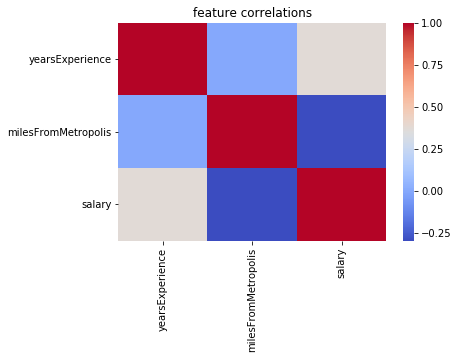

In [415]:
# Correlations Heatmap
corr = postings.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            cmap='coolwarm')
plt.title('feature correlations')
corr

### ---- 5 Establish a baseline ----

In [416]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [417]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [418]:
#Prepare data for modeling
# Create dummy variables in place of categorical data
#for column in postings.columns:
 #   if postings[column].dtype ==object:
  #      dummyCols = pd.get_dummies(postings[column])
   #     postings = postings.join(dummyCols)
      #  del postings[column]

In [419]:
# Create arrays for independent variables and target variable(salary)
jobFeatures = postings[[ 'jobType','degree','major','industry','yearsExperience','milesFromMetropolis']]
salary = postings['salary']

In [420]:
#Create Dummy variables for independent variable matrix
jobFeatures = pd.get_dummies(data = jobFeatures,drop_first = True)
jobFeatures.head()

,yearsExperience,milesFromMetropolis,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,3,73,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,10,38,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
3,8,17,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8,16,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [421]:
jobFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 27 columns):
yearsExperience           999995 non-null int64
milesFromMetropolis       999995 non-null int64
jobType_CFO               999995 non-null uint8
jobType_CTO               999995 non-null uint8
jobType_JANITOR           999995 non-null uint8
jobType_JUNIOR            999995 non-null uint8
jobType_MANAGER           999995 non-null uint8
jobType_SENIOR            999995 non-null uint8
jobType_VICE_PRESIDENT    999995 non-null uint8
degree_DOCTORAL           999995 non-null uint8
degree_HIGH_SCHOOL        999995 non-null uint8
degree_MASTERS            999995 non-null uint8
degree_NONE               999995 non-null uint8
major_BUSINESS            999995 non-null uint8
major_CHEMISTRY           999995 non-null uint8
major_COMPSCI             999995 non-null uint8
major_ENGINEERING         999995 non-null uint8
major_LITERATURE          999995 non-null uint8
major_MATH               

,yearsExperience,milesFromMetropolis,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
yearsExperience,1.000000,0.000672,-0.000103,0.000967,-0.001192,-0.000001,-0.000269,0.000222,0.000068,0.000695,...,0.000643,-0.000005,0.000110,-0.000269,0.000436,0.000977,-0.001106,0.000801,0.000128,-0.000233
milesFromMetropolis,0.000672,1.000000,0.000566,0.000674,-0.001120,0.001713,-0.000406,0.000567,-0.001325,0.001272,...,0.001426,-0.000912,-0.001626,0.000221,0.000807,0.000050,-0.000400,-0.000550,0.000685,-0.000935
jobType_CFO,-0.000103,0.000566,1.000000,-0.142475,-0.142427,-0.142180,-0.142524,-0.143022,-0.142598,0.023008,...,0.010553,0.014043,-0.050205,0.013497,-0.000930,0.000778,0.001920,-0.000634,-0.000771,0.001052
jobType_CTO,0.000967,0.000674,-0.142475,1.000000,-0.142868,-0.142621,-0.142966,-0.143465,-0.143040,0.023785,...,0.014675,0.014514,-0.050948,0.013176,0.000450,-0.000793,-0.001581,0.001938,0.000922,-0.000200
jobType_JANITOR,-0.001192,-0.001120,-0.142427,-0.142868,1.000000,-0.142572,-0.142917,-0.143417,-0.142992,-0.174274,...,-0.094360,-0.093603,0.354202,-0.094126,0.000196,-0.000477,-0.001101,-0.001272,0.000235,0.000530
jobType_JUNIOR,-0.000001,0.001713,-0.142180,-0.142621,-0.142572,1.000000,-0.142670,-0.143168,-0.142744,0.025251,...,0.013610,0.013190,-0.049764,0.012325,0.001565,-0.000355,0.001452,-0.002537,-0.000111,-0.000037
jobType_MANAGER,-0.000269,-0.000406,-0.142524,-0.142966,-0.142917,-0.142670,1.000000,-0.143515,-0.143089,0.024048,...,0.014884,0.013315,-0.050402,0.014457,-0.000860,0.000713,-0.001111,0.000151,0.000120,-0.000905
jobType_SENIOR,0.000222,0.000567,-0.143022,-0.143465,-0.143417,-0.143168,-0.143515,1.000000,-0.143589,0.026186,...,0.014397,0.011688,-0.052190,0.013728,0.000827,-0.000714,-0.000224,0.001871,0.000497,-0.000737
jobType_VICE_PRESIDENT,0.000068,-0.001325,-0.142598,-0.143040,-0.142992,-0.142744,-0.143089,-0.143589,1.000000,0.026001,...,0.012787,0.015050,-0.049690,0.012214,-0.001398,0.000106,0.002264,-0.000119,-0.000072,-0.000028
degree_DOCTORAL,0.000695,0.001272,0.023008,0.023785,-0.174274,0.025251,0.024048,0.026186,0.026001,1.000000,...,0.104087,0.103896,-0.388091,0.102870,0.000112,0.000230,0.000534,0.001131,-0.002366,-0.000870


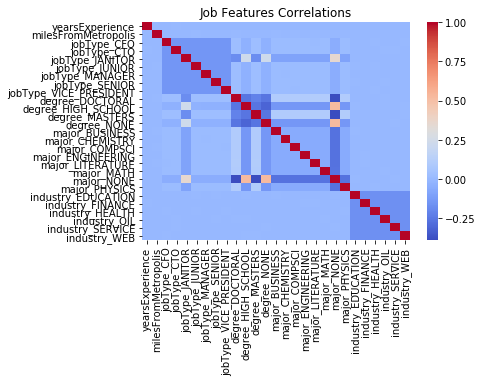

In [422]:
#Check correlations between features

jobFeaturesCorr = jobFeatures.corr()
sns.heatmap(jobFeaturesCorr, 
            xticklabels = jobFeaturesCorr.columns.values,
            yticklabels = jobFeaturesCorr.columns.values,
            cmap='coolwarm')
plt.title('Job Features Correlations')
jobFeaturesCorr


In [423]:
#Narrow down features for use in training model 
#jobFeatures = postings[[ 'jobType','degree','major','industry','yearsExperience','milesFromMetropolis']]

In [424]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split

In [425]:
jobFeatures_train, jobFeatures_test, salary_train,salary_test = train_test_split(jobFeatures,salary,test_size=0.3,random_state=97)
#jobFeatures_train.info()


### ---- 8 Create models & 9 Test Models ----

In [426]:
# 1. Train Linear Regression Model
from sklearn.linear_model import LinearRegression



In [427]:
#Create instane of LinearRegression()
lm = LinearRegression()

In [428]:
#Train lm on training data
lm.fit(jobFeatures_train, salary_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [429]:
#show model coefficients
#print('Coefficients:\n',lm.coef_)

In [430]:
#Make Predictions 
salaryPredictions = lm.predict(jobFeatures_test)

Text(0, 0.5, 'Salary Predictions')

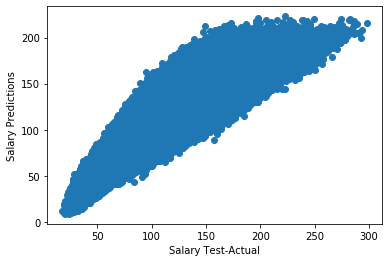

In [431]:
plt.scatter(salary_test,salaryPredictions)
plt.xlabel('Salary Test-Actual')
plt.ylabel('Salary Predictions')


Test Linear Regression model

In [432]:
#Calculate Performance Metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(salary_test, salaryPredictions))
print('MSE:', metrics.mean_squared_error(salary_test, salaryPredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(salary_test, salaryPredictions)))

MAE: 15.84799830571894
MSE: 384.2114223853466
RMSE: 19.60131175164934


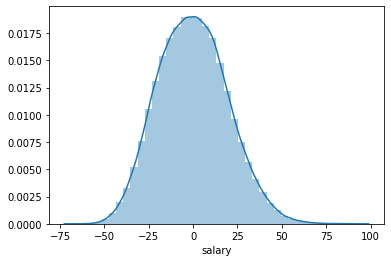

In [433]:
#Check residuals for normal distribution
sns.distplot((salary_test-salaryPredictions),bins=40)

In [434]:
#View effect of Coefficients
coefficients = pd.DataFrame(lm.coef_,jobFeatures.columns)
coefficients.columns = ['Coefficient']
coefficients.sort_values('Coefficient', ascending=False )

,Coefficient
industry_OIL,21.346119
industry_FINANCE,21.155399
industry_WEB,12.167593
major_ENGINEERING,10.592720
degree_DOCTORAL,10.009603
major_BUSINESS,7.615859
industry_HEALTH,6.238839
major_MATH,5.153868
degree_MASTERS,4.948904
major_COMPSCI,3.938301


In [435]:
# View Regression Results
#import statsmodels.api as sm


In [436]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [437]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [438]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [439]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data